In [1]:
using PyPlot
using FastGaussQuadrature

# grid variables

In [2]:
const Nb = 1000
const Np = Nb + 1
const lmax = 2^6 - 1
const Lo = 40.0
const rmax = 8000.0
const Z = 1.0

1.0

In [3]:
@time xi, wi = gausslobatto(Np)
@time xi = xi[2:Nb+1]; wi = wi[2:Nb+1];

  8.600684 seconds (6.12 M allocations: 281.069 MB, 2.32% gc time)
  0.000018 seconds (7 allocations: 8.141 KB)


In [4]:
potential(r::Array{Float64, 1}, l::Int64, Z::Float64) = 0.5(l*(l+1))./r.^2 - Z./r

potential (generic function with 1 method)

In [5]:
r(x::Array{Float64, 1}) = Lo*(1 .+ x)./(1 .- x + 2*Lo/rmax)

r (generic function with 1 method)

In [48]:
drdx(x::Array{Float64, 1}) = Lo./(1.-x+2*Lo/rmax) + Lo.*(1.+x)./(1-x+2Lo/rmax).^2

drdx (generic function with 1 method)

In [6]:
V = zeros(Nb, lmax+1)
@time for l in 0:lmax
    V[:, l+1] = potential(r(xi), l, Z);
end

  0.044366 seconds (20.59 k allocations: 5.322 MB, 14.34% gc time)


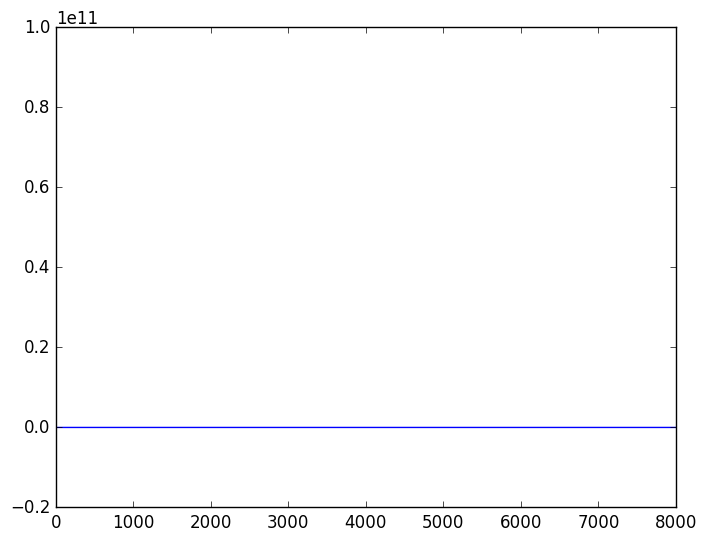

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000026EC3B38>

In [7]:
plot(r(xi), V[:, end])
# axis([0, 100, -2, 1])
# ylim([-1, 1])
# xlim([0, 1])

In [45]:
# function eigen(U, V, xi, E0, Z, Nk)
@time begin
    H = zeros(Nb, Nb)
    H0 = similar(H)
    Dxx = similar(H)
    U = zeros(Nb, Nb, lmax+1)
    rx = drdx(x)
    for i in 1:Nb
        for j in union(1:i-1, i+1:Nb)
            Dxx[i, j] = -2/(xi[i]-xi[j])^2
        end
        Dxx[i, i] = -(Np*(Np+1))/3(1-xi[i]^2)
    end
    for l in 0:lmax
        for i in 1:Nb
            for j in i:Nb
                H[i,j] = -0.5/rx[i]*Dxx[i,j]/rx[j]
            end
            H[i, i] += V[i, l]
        end
        eig(H)
end

  0.563604 seconds (12.59 M allocations: 257.642 MB, 5.87% gc time)
